In [1]:
import matplotlib.pyplot as plt
import matplotlib
import cartopy
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import shapely.geometry as sgeom  #for box drawing
import geopandas as gpd
import numpy as np
import mapclassify as mc
import pandas as pd

In [2]:
Depa = gpd.read_file(r'MGN_DPTO_POLITICO.shp')

In [3]:
Depa

,DPTO_CCDGO,DPTO_CNMBR,DPTO_NANO_,DPTO_CACTO,DPTO_NANO,SHAPE_AREA,SHAPE_LEN,geometry
0,18,CAQUETÁ,1981,Ley 78 del 29 de Diciembre de 1981,2020,7.318485,21.384287,"POLYGON ((-74.89423 2.95852, -74.89410 2.95852..."
1,19,CAUCA,1857,15 de junio de 1857,2020,2.534419,13.950263,"POLYGON ((-76.45922 3.32872, -76.45878 3.32870..."
2,86,PUTUMAYO,1991,Articulo 309 Constitucion Politica de 1991,2020,2.107965,12.707922,"POLYGON ((-76.67050 1.46732, -76.67000 1.46730..."
3,76,VALLE DEL CAUCA,1910,Decreto No 340 de 16 de Abril de 1910,2020,1.679487,12.650870,"MULTIPOLYGON (((-76.07931 5.04469, -76.07938 5..."
4,94,GUAINÍA,1991,Articulo 309 Constitucion Politica de 1991,2020,5.747937,21.179051,"POLYGON ((-67.67638 3.91228, -67.67305 3.90931..."
5,99,VICHADA,1991,5 de Julio Constitucion Politica de 1991,2020,8.100680,17.292613,"POLYGON ((-67.80972 6.32432, -67.80946 6.32432..."
6,85,CASANARE,1991,5 de Julio Constitucion Politica de 1991,2020,3.615063,12.132754,"POLYGON ((-72.33885 6.34471, -72.33920 6.34454..."
7,91,AMAZONAS,1991,Dcto. 2274 del 4 de Octubre de la Constitución...,2020,8.877480,25.355977,"POLYGON ((-71.14469 0.05572, -71.14508 0.05349..."
8,97,VAUPÉS,1991,Articulo 309 Constitucion Politica de 1991,2020,4.313810,20.129834,"POLYGON ((-70.11033 2.08010, -70.10981 2.08002..."
9,95,GUAVIARE,1991,5 de Julio Constitucion Politica de 1991,2020,4.511457,19.396789,"POLYGON ((-71.31266 2.92463, -71.31215 2.92445..."


In [4]:
popdensity = {
    'CAQUETÁ': 0.8,
    'CAUCA': 4251,
    'PUTUMAYO': 86,
    'VALLE DEL CAUCA': 360,
    'GUAINÍA': 438.00,
    'VICHADA': 387.35,
    'CASANARE': 312.68,
    'AMAZONAS': 271.40,
    'VAUPÉS': 209.23,
    'GUAVIARE': 155.18,
    'CALDAS': 154.87,
    'QUINDIO': 114.43,
    'RISARALDA':  107.05,
    'ANTIOQUIA': 105.80,
    'CHOCÓ': 86.27,
    'NARIÑO': 83.85,
    'CÓRDOBA': 69.03,
    'BOLÍVAR': 67.55,
    'CESAR': 65.46,
    'LA GUAJIRA': 63.80,
    'MAGDALENA': 54.59,
    'SUCRE': 53.29,
    'ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA': 53.20,
    'ARAUCA': 51.45,
    'BOYACÁ': 39.61,
    'CUNDINAMARCA': 39.28,
    'NORTE DE SANTANDER': 38.13,
    'BOGOTÁ, D.C.': 34.20,
    'META': 33.84,
    'HUILA': 31.36,
    'Texas': 30.75,
    'SANTANDER': 29.00,
    'TOLIMA': 25.41,
    'ATLÁNTICO': 23.86}

In [5]:
# use this simple colormap
my_colormap = matplotlib.cm.Reds

# some settings
edgecolor = "gray"

# use this column for thematic mapping
theme_value = "pop_per_sqkm"


In [6]:
# A function that draws inset map
# ===============================
def add_insetmap(axes_extent, map_extent, state_name, facecolor, edgecolor, geometry):
    # create new axes, set its projection
    use_projection = ccrs.Mercator()      # preserves shape
    #use_projection = ccrs.PlateCarree()  # large distortion in E-W, bad for for Alaska
    geodetic = ccrs.Geodetic(globe=ccrs.Globe(datum='WGS84'))
    sub_ax = plt.axes(axes_extent, projection=use_projection)  # normal units
    sub_ax.set_extent(map_extent, geodetic)  # map extents

    # option to add basic land, coastlines of the map
    # can comment out if you don't need them
    sub_ax.add_feature(cartopy.feature.LAND)
    sub_ax.coastlines()
    sub_ax.set_title(state_name)

    # add map `geometry`
    sub_ax.add_geometries([geometry], ccrs.PlateCarree(), \
                          facecolor=facecolor, edgecolor=edgecolor, lw=0.3)
    # +++ more features can be added here +++
    # plot box around the map
    extent_box = sgeom.box(map_extent[0], map_extent[2], map_extent[1], map_extent[3])
    sub_ax.add_geometries([extent_box], ccrs.PlateCarree(), color='none')


In [7]:
# make dataframe from population data `popdensity` dict object
Depa_popden = pd.DataFrame.from_dict(popdensity, orient='index', 
                                  columns=['pop_per_sqkm'])

In [8]:
# merge `usa_popden` to main dataframe, `usa`
newDepa = Depa.merge(Depa_popden, how='left', left_on='DPTO_CNMBR', right_index=True)

In [9]:
# take only some columns in `newusa` for our operation
newDepa = newDepa[['DPTO_CNMBR', 'pop_per_sqkm', 'geometry']]

In [10]:
# Data classification for thematic mapping
# choose number of classes of population density
# classes --> assigned colors in thematic mapping
num_classes = 7  #will get class-values: 0,1,2,3,4,5,6
sclass = mc.Quantiles(newDepa["pop_per_sqkm"].values, k=num_classes)

In [11]:
# add new column, "sclass", for raw class values, sclass.yb
# its values will be used to assign color for polygon's facecolor
newDepa["sclass"] = sclass.yb

In [12]:
# extract parts of the whole 'newusa' geodataframe for separate plotting/manipulation
# 'usa_main': excluding non-conterminous states
Depa_main = newDepa[~newDepa["DPTO_CNMBR"].isin(["ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA"])] # exclude these
#  re-project usa_main to equal-area conic projection "EPSG:2163"
Depa_main.crs = {'init': 'epsg:4326'}
Depa_main = Depa_main.to_crs(epsg=2163)

D:\Programas\anaconda\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [13]:
# 'usa_more': non-conterminous states, namely, Alaska and Hawaii
Depa_more = newDepa[newDepa["DPTO_CNMBR"].isin(["ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA"])]  # include these

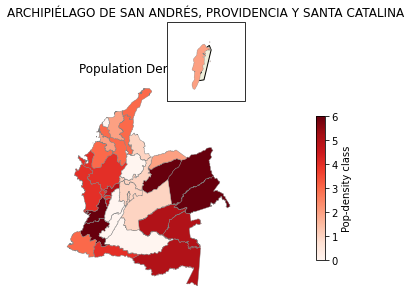

In [37]:
# ------------ Plot --------------
# plot 1st part, using usa_main and grab its axis as 'ax2'
ax2 = Depa_main.plot(column="sclass", legend=False, 
                    cmap=matplotlib.cm.Reds, ec=edgecolor, lw=0.4)

# manipulate colorbar/legend
fig = ax2.get_figure()
cax = fig.add_axes([0.9, .25, 0.02, 0.5])  #[left,bottom,width,height]
sm = plt.cm.ScalarMappable(cmap=my_colormap, 
        norm=plt.Normalize(vmin=min(newDepa["sclass"]),vmax=max(newDepa["sclass"])))

# clear the array of the scalar mappable
sm._A = []
cb = fig.colorbar(sm, cax=cax)
cb.set_label("Pop-density class")
# manipulate the axis seetings
ax2.set_frame_on(False)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.set_title("Population Density Plot")

# plot Alaska, Hawaii as inset maps
for index,state in Depa_more.iterrows():

    if state["DPTO_CNMBR"] in ("ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA"):
        st_name = state["DPTO_CNMBR"]

        # set fill color, using normalized `sclass` on `my_colormap`
        facecolor = my_colormap( state["sclass"] / max(newDepa["sclass"] ))

        if st_name == "ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA":
            # (1) Alaska
            # Custom extent, relative size
            map_extent = (-81.6, -81.8, 12.45, 12.65)    # degrees: (lonmin,lonmax,latmin,latmax)
            axes_extent = (0.5, 0.8, 0.29, 0.275) # axes units: 0 to 1, (LLx,LLy,width,height)

        # add inset maps
        add_insetmap(axes_extent, map_extent, st_name, \
                     facecolor, \
                     edgecolor, \
                     state["geometry"])


In [2]:
#Probando la magia del github
dep

NameError: name 'dep' is not defined